## No Existe Correlación entre Edad y Categoria de Compras

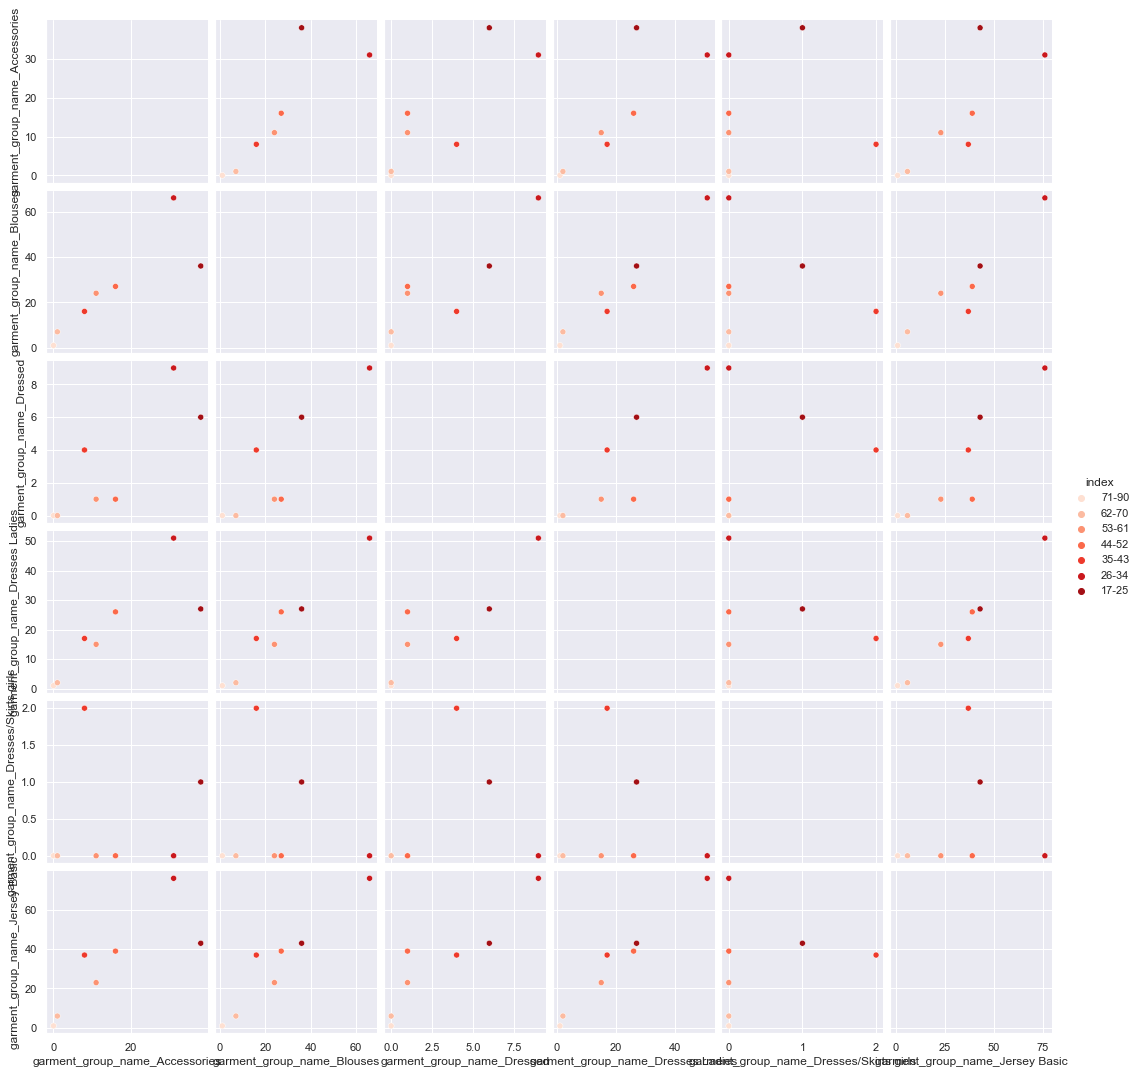

In [73]:
fig=sns.pairplot(df_reseted,y_vars=['garment_group_name_Accessories','garment_group_name_Blouses',
                                'garment_group_name_Dressed','garment_group_name_Dresses Ladies',
                                'garment_group_name_Dresses/Skirts girls','garment_group_name_Jersey Basic'],
             x_vars=['garment_group_name_Accessories','garment_group_name_Blouses',
                                'garment_group_name_Dressed','garment_group_name_Dresses Ladies',
                                'garment_group_name_Dresses/Skirts girls','garment_group_name_Jersey Basic'], hue= 'index', palette='Reds');

fig.savefig("output.png")
 

## Sistema de Recomendación de 10 articulos similares basado en caracteristicas del producto seleccionado

In [74]:
def important_features(dataset):
    data=dataset.copy()
    for i in range(0,dataset.shape[0]):
        data['Article_Summary']=data['product_group_name']+' ' +data['colour_group_name']+' ' +data['product_type_name']+' ' +data['index_group_name']+' ' +data['garment_group_name']+' ' +data['index_group_name']
    return data

In [76]:
data_sample=articles.sample(10000)
data_class = important_features(data_sample)

In [77]:
data_class["ids"]=[i for i in range (0,data_class.shape[0])]

In [78]:
data_class.head(50)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,Article_Summary,ids
45842,684384001,684384,Vanna Beret,75,Hat/beanie,Accessories,1010016,Solid,51,Light Pink,...,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Beret in a felted wool blend with a faux fur p...,Accessories Light Pink Hat/beanie Ladieswear A...,0
3980,472064004,472064,6P LS bodypack,256,Bodysuit,Garment Upper body,1010001,All over pattern,51,Light Pink,...,Baby Sizes 50-98,4,Baby/Children,44,Baby Essentials & Complements,1002,Jersey Basic,"Long-sleeved bodysuits in soft, ribbed organic...",Garment Upper body Light Pink Bodysuit Baby/Ch...,1
91103,846604002,846604,BB FUNC Ben jkt TP,262,Jacket,Garment Upper body,1010005,Colour blocking,9,Black,...,Children Sizes 134-170,4,Baby/Children,45,Kids Outerwear,1007,Outdoor,"Lightly padded jacket in windproof, water-repe...",Garment Upper body Black Jacket Baby/Children ...,2
64286,741040001,741040,Maggie high support,306,Bra,Underwear,1010016,Solid,9,Black,...,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports bra in fast-drying functional fabric wi...,Underwear Black Bra Sport Jersey Fancy Sport,3
76736,786197001,786197,Coco skirt,275,Skirt,Garment Lower body,1010026,Other structure,73,Dark Blue,...,Ladieswear,1,Ladieswear,11,Womens Tailoring,1012,Skirts,"Short, A-line skirt in a sturdy, textured weav...",Garment Lower body Dark Blue Skirt Ladieswear ...,4
22619,599489001,599489,Straight H.W,272,Trousers,Garment Lower body,1010023,Denim,71,Light Blue,...,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"5-pocket, high-waisted straight jeans in washe...",Garment Lower body Light Blue Trousers Divided...,5
35010,644762003,644762,Fancy Dress,265,Dress,Garment Full body,1010005,Colour blocking,9,Black,...,Divided,2,Divided,58,Divided Selected,1013,Dresses Ladies,"Short, fitted dress in sturdy jersey with a V-...",Garment Full body Black Dress Divided Dresses ...,6
14575,563519011,563519,Simba,252,Sweater,Garment Upper body,1010016,Solid,9,Black,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Fitted, polo-neck top in soft viscose jersey.",Garment Upper body Black Sweater Ladieswear Je...,7
71234,763270005,763270,Janet,252,Sweater,Garment Upper body,1010010,Melange,83,Dark Turquoise,...,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Jumper in a soft knit containing some wool wit...,Garment Upper body Dark Turquoise Sweater Ladi...,8
8316,522374004,522374,Candice,252,Sweater,Garment Upper body,1010016,Solid,6,Light Grey,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1003,Knitwear,"Jumper in a soft, fine knit with dropped shoul...",Garment Upper body Light Grey Sweater Ladieswe...,9


In [79]:
vec=TfidfVectorizer()
vecs=vec.fit_transform(data_class["Article_Summary"].apply(lambda x: np.str_(x)))
sim=cosine_similarity(vecs)

In [80]:
def recommend(title):
    ar_id=data_class[data_class.prod_name==title]["ids"].values[0]
    scores=list(enumerate(sim[ar_id]))
    sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)
    sorted_scores=sorted_scores[1:]
    art=[data_class[art[0]==data_class["ids"]]["prod_name"].values[0] for art in sorted_scores]
    #art_id=[data_class[art_id[0]==data_class["ids"]]["article_id"].values[0] for art_id in sorted_scores]
    return art



In [81]:
def recommend_ten(art_list):
    first_ten=[]
    count=0
    for art in art_list:
        if count > 11:
            break
        count+=1
        first_ten.append(art)
    return first_ten

In [ ]:
#lista=recommend('Simz anorak')
#Recommendations=recommend_ten(lista)
#Recommendations

In [ ]:
#lista=recommend('Alex tee')
#Recommendations=recommend_ten(lista)
#Recommendations

In [ ]:
#lista=recommend('TIMOTHY JOGGER')
#Recommendations=recommend_ten(lista)
#Recommendations

In [ ]:
#data_class.loc[articles['prod_name'] == 'Puffer gilet']

In [ ]:
#599945007 , 599945006 , 599945020 Simz anorak	
#'Jon varsity', 559776003
# 'Elliot Quilted Jkt', 803452001
# 'Paul windbreaker', 762173001
# 'Bobby (1)', 648254004 , 497637015
# 'Simz anorak',
# 'Dos utility jacket', 632496001
# 'Moon racer jacket', 711239003
# 'Tom coach jkt', 849204006
# 'Java bomber', 902811004
# 'Kurt Cord Jacket', 754387001
# 'CAD puffer', 799164001
# 'Puffer gilet'] 889895001

In [ ]:
#TIMOTHY JOGGER 812922001
#BAT jogger', 829791001
# 'Meadow trs',806183004, 553881003
# 'Meadow',870524006, 870524008
# 'ENZO JOGGERS',618475001
# 'Naomi',660590004
# 'Hazza',811392002, 811392002
# 'DRAKE sweatpants TP',807820011, 869158007, 753206006, 869158002
# 'North utility jogger', 918114001
# 'Drake sweatpants',564999002
# 'SMITH fancy sweatpants',792299003
# 'Tuxedo junior pants',794221002
# 'Kacey pants']858455002, 867943001

In [ ]:
#514577010 Alex tee
#'Miso',675203008
# 'Pelican',629551001
# 'Sheena NT shirt P (RW)',656067007
# 'Smedby',611364001
# 'Bonjour jaquard blouse',705973002
# 'Petter Popover shirt',690506001
# 'River',763037003
# 'Missy elliot long shirt',482207009, 482207007
# 'Eve denim blouse',895792001
# 'MC Pascal',814805003
# 'Lysekil one shoulder',642156003
# 'Knut flowy blouse'675943001, 675943004

In [ ]:
#Jackie waterproof SG 648429001,648429002

#'May boot SG',623990001
# 'Blake chelsea boot SG',765732001,887561002
# 'West puffer boot waterproof SB',646691002
# 'Olivia boot SG',624945004,734385002,702799003,624945001
# 'Olivia boot SG',
# 'Jane Fancy BG',664817001
# 'Lara high boot BG',896151001
# 'Katie playful SG',887559001
# 'Katie boot SG.',809684002
# 'Reeze Boot Baby',748751011,748751009
# 'Rainboot SB',820712001
# 'Pluie rainboot SG',706017001

In [ ]:
#Utah dress 718067001


#'Napolitana Dress', 685823004
# 'Jenny boho dress', 714750001
# 'Jill l/s dress w', 733361003
#'POWER DRESS',868955001
# 'SPEED Binx',677982001
# 'Fiona dress',638019001
# 'SPEED Barbados W',679332001
# 'Biker pinafore Dress',708767010
# 'Fancy Dress',644762004
# 'Hunt dress W',690504001
# 'Charlotte A-line dress',836130002
# 'Zoo'504113004,504113014